#1주차 과제
- 파이토치 시작하기 및 간단한 코드 빈칸 채워넣기

#파이토치 시작하기

파이토치 시작하기

In [1]:
import torch 

- tensor 개념 파악 (array of numerical values(vector, matrix..))
- 4x3 행렬 두개 만들고 행으로 병합, 열로 병합


In [2]:
X = torch.rand(4,3)
Y = torch.rand(4,3)
print(f"{X}=X")
print(f"{Y}=Y")
row = torch.cat((X,Y),0)
column = torch.cat((X,Y),1)
print(row)
print(column)
###행으로 병합 코드
###열로 병합 코드

tensor([[0.1179, 0.5795, 0.3943],
        [0.3408, 0.5232, 0.5308],
        [0.1495, 0.4972, 0.3788],
        [0.1279, 0.1870, 0.2663]])=X
tensor([[0.0783, 0.7495, 0.8737],
        [0.5146, 0.8272, 0.2541],
        [0.5311, 0.4893, 0.2192],
        [0.7457, 0.8080, 0.2778]])=Y
tensor([[0.1179, 0.5795, 0.3943],
        [0.3408, 0.5232, 0.5308],
        [0.1495, 0.4972, 0.3788],
        [0.1279, 0.1870, 0.2663],
        [0.0783, 0.7495, 0.8737],
        [0.5146, 0.8272, 0.2541],
        [0.5311, 0.4893, 0.2192],
        [0.7457, 0.8080, 0.2778]])
tensor([[0.1179, 0.5795, 0.3943, 0.0783, 0.7495, 0.8737],
        [0.3408, 0.5232, 0.5308, 0.5146, 0.8272, 0.2541],
        [0.1495, 0.4972, 0.3788, 0.5311, 0.4893, 0.2192],
        [0.1279, 0.1870, 0.2663, 0.7457, 0.8080, 0.2778]])


linear regression implementation from scratch
- 머신러닝 기초와 비슷한 내용이지만 파이토치로 실행해보며 익숙해지는것이 목표


In [3]:
!pip install d2l

In [4]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

In [5]:
def synthetic_data(w, b, num_examples):
    """Generate y = Xw + b + noise."""
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

true_w = torch.tensor([3, -1.5])
true_b = 5.5
features, labels = synthetic_data(true_w, true_b, 2000)

In [6]:
print('features:', features[0],'\nlabel:', labels[0])

features: tensor([ 0.3404, -0.7512]) 
label: tensor([7.6444])


In [7]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # The examples are read at random, in no particular order
    random.shuffle(indices)
     ###반복문으로 채워넣기:
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
            indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

In [8]:
batch_size = 20

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[-0.7042, -0.2494],
        [ 2.9629, -0.4036],
        [ 1.4711,  1.1113],
        [ 0.2091,  0.3210],
        [-0.1880, -1.4919],
        [ 0.5815, -0.8305],
        [-0.3130,  1.6425],
        [ 1.4553,  0.3216],
        [ 0.8851, -0.0410],
        [-0.1053, -0.6998],
        [-0.3829,  1.4561],
        [-1.0050,  0.6773],
        [ 0.6253, -0.1852],
        [-0.4015,  2.1585],
        [-0.3425, -1.0352],
        [-2.0886, -1.8196],
        [-0.2316,  0.8245],
        [ 0.6810,  1.3052],
        [ 0.8162,  0.4389],
        [-1.9429, -1.8976]]) 
 tensor([[ 3.7645],
        [14.9962],
        [ 8.2354],
        [ 5.6370],
        [ 7.1770],
        [ 8.4874],
        [ 2.1088],
        [ 9.3900],
        [ 8.2134],
        [ 6.2236],
        [ 2.1607],
        [ 1.4633],
        [ 7.6685],
        [ 1.0488],
        [ 6.0230],
        [ 1.9630],
        [ 3.5656],
        [ 5.5752],
        [ 7.2830],
        [ 2.5082]])


In [9]:
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.tensor([1.0],requires_grad=True)#원하는 실수를 넣어주세요

In [10]:
def linreg(X, w, b):
    """The linear regression model."""
    return torch.matmul(X, w) + b

In [11]:
def squared_loss(y_hat, y):  
    """Squared loss."""
    return (y_hat-y.reshape(y_hat.shape))**2/2

In [12]:
def sgd(params, lr, batch_size):
    """Minibatch stochastic gradient descent."""
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size 
            param.grad.zero_()
        ###반복문으로 채워넣기

In [14]:
lr = 0.01 ###직접 설정
num_epochs = 20 ###직접 설정
net = linreg ###위에서 가져오기
loss = squared_loss ###위에서 가져오기

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X,w,b),y)
        # Compute gradient on `l` with respect to [`w`, `b`]
        l.sum().backward()
        sgd([w, b], lr, batch_size) 
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 2.117601
epoch 2, loss 0.286933
epoch 3, loss 0.038988
epoch 4, loss 0.005344
epoch 5, loss 0.000771
epoch 6, loss 0.000147
epoch 7, loss 0.000063
epoch 8, loss 0.000051
epoch 9, loss 0.000049
epoch 10, loss 0.000049
epoch 11, loss 0.000049
epoch 12, loss 0.000049
epoch 13, loss 0.000049
epoch 14, loss 0.000049
epoch 15, loss 0.000049
epoch 16, loss 0.000049
epoch 17, loss 0.000049
epoch 18, loss 0.000049
epoch 19, loss 0.000049
epoch 20, loss 0.000049


In [15]:
print(f'error in estimating w: {true_w - w.reshape(true_w.shape)}')
print(f'error in estimating b: {true_b - b}')

error in estimating w: tensor([-0.0002,  0.0002], grad_fn=<SubBackward0>)
error in estimating b: tensor([0.0001], grad_fn=<RsubBackward1>)


+cost graph 그리기 (x축 w, y축 loss)

In [16]:
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.tensor([1.0],requires_grad=True) 

lr = 0.01  
num_epochs = 20 
net = linreg 
loss = squared_loss  

w_list = []
loss_list = []
for epoch in range(num_epochs):
    w_list.append(torch.tensor(w))
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X,w,b),y) 
        # Compute gradient on `l` with respect to [`w`, `b`]
        l.sum().backward()
        sgd([w, b], lr, batch_size) 
         
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}' )
        loss_list.append(train_l.mean())

C:\Users\candy\anaconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  if sys.path[0] == '':


epoch 1, loss 2.129729
epoch 2, loss 0.288607
epoch 3, loss 0.039221
epoch 4, loss 0.005367
epoch 5, loss 0.000775
epoch 6, loss 0.000149
epoch 7, loss 0.000063
epoch 8, loss 0.000051
epoch 9, loss 0.000049
epoch 10, loss 0.000049
epoch 11, loss 0.000049
epoch 12, loss 0.000049
epoch 13, loss 0.000049
epoch 14, loss 0.000049
epoch 15, loss 0.000049
epoch 16, loss 0.000049
epoch 17, loss 0.000049
epoch 18, loss 0.000049
epoch 19, loss 0.000049
epoch 20, loss 0.000049


In [32]:
print(w_list)
print(loss_list)

[tensor([[-0.0248],
        [ 0.0018]]), tensor([[ 1.8540],
        [-0.9503]]), tensor([[ 2.5656],
        [-1.2985]]), tensor([[ 2.8354],
        [-1.4259]]), tensor([[ 2.9378],
        [-1.4728]]), tensor([[ 2.9765],
        [-1.4900]]), tensor([[ 2.9912],
        [-1.4964]]), tensor([[ 2.9968],
        [-1.4987]]), tensor([[ 2.9989],
        [-1.4996]]), tensor([[ 2.9998],
        [-1.5000]]), tensor([[ 3.0001],
        [-1.5000]]), tensor([[ 3.0001],
        [-1.5001]]), tensor([[ 3.0003],
        [-1.5001]]), tensor([[ 3.0002],
        [-1.5001]]), tensor([[ 3.0002],
        [-1.5001]]), tensor([[ 3.0002],
        [-1.5001]]), tensor([[ 3.0002],
        [-1.5002]]), tensor([[ 3.0002],
        [-1.5001]]), tensor([[ 3.0002],
        [-1.5002]]), tensor([[ 3.0002],
        [-1.5002]])]
[tensor(2.1297), tensor(0.2886), tensor(0.0392), tensor(0.0054), tensor(0.0008), tensor(0.0001), tensor(6.2773e-05), tensor(5.1032e-05), tensor(4.9393e-05), tensor(4.9230e-05), tensor(4.9212e-05), te

In [33]:
w0_list=[]
for i in range(num_epochs):
    w0_list.append(w_list[i])
print(w0_list)

[tensor([[-0.0248],
        [ 0.0018]]), tensor([[ 1.8540],
        [-0.9503]]), tensor([[ 2.5656],
        [-1.2985]])]


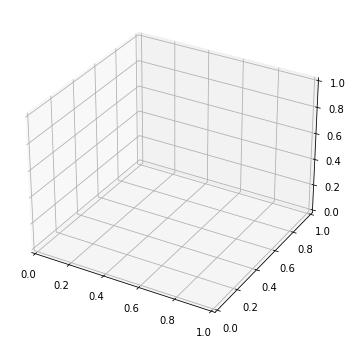

In [26]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111, projection='3d')

x = np.array() 
y = np.array() 
z = np.array() 

#https://jimmy-ai.tistory.com/30 참조

concise implementation of linear regression 
- api 사용해보기

In [17]:
import numpy as np
import torch
from torch.utils import data
from d2l import torch as d2l


true_w = torch.tensor([3, -1.5])
true_b = 5.5
features, labels = d2l.synthetic_data(true_w, true_b, 2000)

In [18]:
def load_array(data_arrays, batch_size, is_train=True): 
    """Construct a PyTorch data iterator."""
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset, batch_size, shuffle=is_train)

batch_size = 20
data_iter = load_array((features, labels), batch_size)

In [19]:
next(iter(data_iter))

[tensor([[ 0.1457, -0.6405],
         [-0.9733, -0.1248],
         [-0.4334, -2.1630],
         [-1.8143, -0.2806],
         [-0.2666, -0.1844],
         [ 0.6963, -0.5218],
         [-0.4952, -0.2754],
         [ 0.5972, -0.0750],
         [-1.0094, -0.0338],
         [-1.2391, -0.4006],
         [-0.2575, -1.1271],
         [ 0.2915,  0.1317],
         [ 0.5990,  0.0566],
         [ 1.8786, -0.7737],
         [ 0.7626, -0.7933],
         [ 1.6840,  1.7051],
         [-0.2532,  0.1232],
         [ 0.7357,  1.6321],
         [-0.9803, -0.2330],
         [-0.0220, -1.0585]]),
 tensor([[ 6.9046],
         [ 2.7592],
         [ 7.4704],
         [ 0.4749],
         [ 4.9890],
         [ 8.3668],
         [ 4.4330],
         [ 7.4087],
         [ 2.5203],
         [ 2.3895],
         [ 6.4144],
         [ 6.1941],
         [ 7.2040],
         [12.2943],
         [ 8.9787],
         [ 7.9888],
         [ 4.5463],
         [ 5.2637],
         [ 2.8950],
         [ 7.0226]])]

In [20]:
from torch import nn

net = nn.Sequential(nn.Linear(2,1))

In [21]:
net[0].weight.data.normal_(0, 0.01)
net[0].bias.data.fill_(0)

tensor([0.])

In [22]:
loss = nn.MSELoss()

In [23]:
trainer = torch.optim.SGD(net.parameters(), lr=0.01)

In [24]:
num_epochs = 3
for epoch in range(num_epochs):
    for X, y in data_iter:
        l = loss(net(X),y)
        trainer.zero_grad()
        l.backward()
        trainer.step()
    l = loss(net(features), labels)
    print(f'epoch {epoch + 1}, loss {l:f}')

epoch 1, loss 0.696527
epoch 2, loss 0.011670
epoch 3, loss 0.000289


In [25]:
w = net[0].weight.data
print('error in estimating w:', true_w - w.reshape(true_w.shape))
b = net[0].bias.data
print('error in estimating b:', true_b - b)

error in estimating w: tensor([ 0.0054, -0.0039])
error in estimating b: tensor([0.0116])
